In [12]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [13]:
pip install quandl

In [23]:
import pandas as pd
import quandl
import datetime
start = datetime.datetime(2006,1,1)
end = datetime.date.today()
amz = quandl.get("WIKI/AMZN", start_date=start, end_date=end)
import pandas_datareader as web

In [24]:
amz.shape

(3077, 12)

In [25]:
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real Amazon Stock Price')
    plt.plot(predicted, color='blue',label='Predicted Amazon Stock Price')
    plt.title('Amazon Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Amazon Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [26]:
pip install yfinance

In [90]:
dataset = web.DataReader('AMZN', data_source='yahoo',start='2006-01-01',end = '2020-01-01')
dataset.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.849998,46.250000,47.470001,47.580002,7582200,47.580002
2006-01-04,47.730000,46.689999,47.490002,47.250000,7440900,47.250000
2006-01-05,48.200001,47.110001,47.160000,47.650002,5417200,47.650002
2006-01-06,48.580002,47.320000,47.970001,47.869999,6152900,47.869999
2006-01-09,47.099998,46.400002,46.549999,47.080002,8943100,47.080002


In [91]:
dataset.shape


(3523, 6)

In [92]:
training_set = dataset[:'2018'].iloc[:,1:2].values
test_set = dataset['2019':].iloc[:,1:2].values

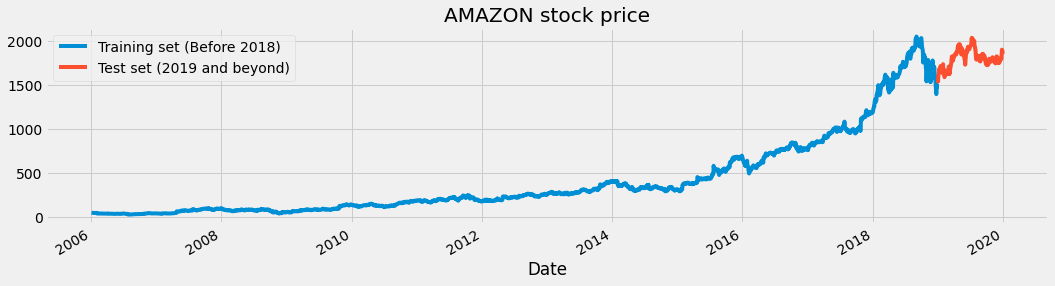

In [93]:
#We have chosen 'High' attribute for prices. Let's see what it looks like
dataset["High"][:'2018'].plot(figsize=(16,4),legend=True)
dataset["High"]['2019':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2018)','Test set (2019 and beyond)'])
plt.title('AMAZON stock price')
plt.show()

In [94]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)


In [95]:
X_train = []
y_train = []
for i in range(60,2768):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [96]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [97]:
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=5,batch_size=32)

Epoch 1/5
85/85 [==============================] - 1s 15ms/step - loss: 0.0020
Epoch 2/5
85/85 [==============================] - 1s 14ms/step - loss: 8.4735e-04
Epoch 3/5
85/85 [==============================] - 1s 15ms/step - loss: 5.8368e-04
Epoch 4/5
85/85 [==============================] - 1s 14ms/step - loss: 5.5720e-04
Epoch 5/5
85/85 [==============================] - 1s 15ms/step - loss: 5.2191e-04


In [98]:
dataset_total = pd.concat((dataset["High"][:'2018'],dataset["High"]['2019':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [99]:
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

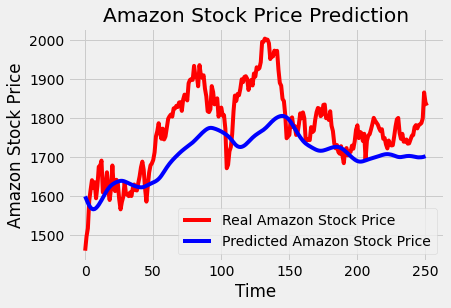

In [100]:
plot_predictions(test_set,predicted_stock_price)

In [ ]:
import jovian
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
